# Anscombe's Quartet

This script is meant to illustrate the importance of VISUAL INSPECTION of a dataset. The example is taken from a __[paper](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf)__ written by Frank Anscombe in 1973.

In this problem, you are provided with four datasets sharing the following characteristics:

-  Mean of each x variable: 9.0
-  Variance of each x variable: 10.0
-  Mean of each y variable:  7.5
-  Variance of each y variable: 3.75
-  Correlation between each x and y variable: 0.816
-  Linear regression line: y = 3 + 0.5x

The purpose of this example is to show that, despite having the same statistical propeties, data sets can often look very different from one another, hence the importance of plotting the data first.

## References:
- __[Wikipedia: "Anscombe's Quartet"](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)__

## Author(s), contact(s), and dates:
- Author: Troels C. Petersen (NBI)
- Email:  petersen@nbi.dk
- Date:   16th of November 2023

---

### Your Task
1) First acquaint yourself with the program, and get yourself a "free" (hopefully not first!) look at how Python works. Understand that each of the four distributions are being fitted with a linear function (here called "fit_p1") and the results plotted. There are comments for most lines in the macro!

2) Run each step of the notebook sequentially, and then take a close look at each of the four results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import sys

In [2]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure

We begin by inserting the data into numpy arrays:

In [3]:
save_plots = True
N_datasets = 4
N_points   = 11

In [4]:
# Define data samples
x = np.array([ [ 10.0,  8.0, 13.0,  9.0, 11.0, 14.0,  6.0,  4.0, 12.0,  7.0,  5.0 ] ,
               [ 10.0,  8.0, 13.0,  9.0, 11.0, 14.0,  6.0,  4.0, 12.0,  7.0,  5.0 ] ,
               [ 10.0,  8.0, 13.0,  9.0, 11.0, 14.0,  6.0,  4.0, 12.0,  7.0,  5.0 ] ,
               [  8.0,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0, 19.0,  8.0,  8.0,  8.0 ] ])

In [5]:
y = np.array([ [ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,  4.82,  5.68 ]  ,
               [ 9.14,  8.14,  8.74,  8.77,  9.26,  8.10,  6.13,  3.10,  9.13,  7.26,  4.74 ]  ,
               [ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,  6.42,  5.73 ]  ,
               [ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.50,  5.56,  7.91,  6.89 ] ])

We then proceed to fit the data with a linear fit defined below:

In [6]:
def linear_fit(x, p0, p1):
    return p0 + p1*x

/home/jufo/Documents/university/AppStat2023/Week1/AnscombesQuartet/../../External_Functions/ExternalFunctions.py:113: VisibleDeprecationWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


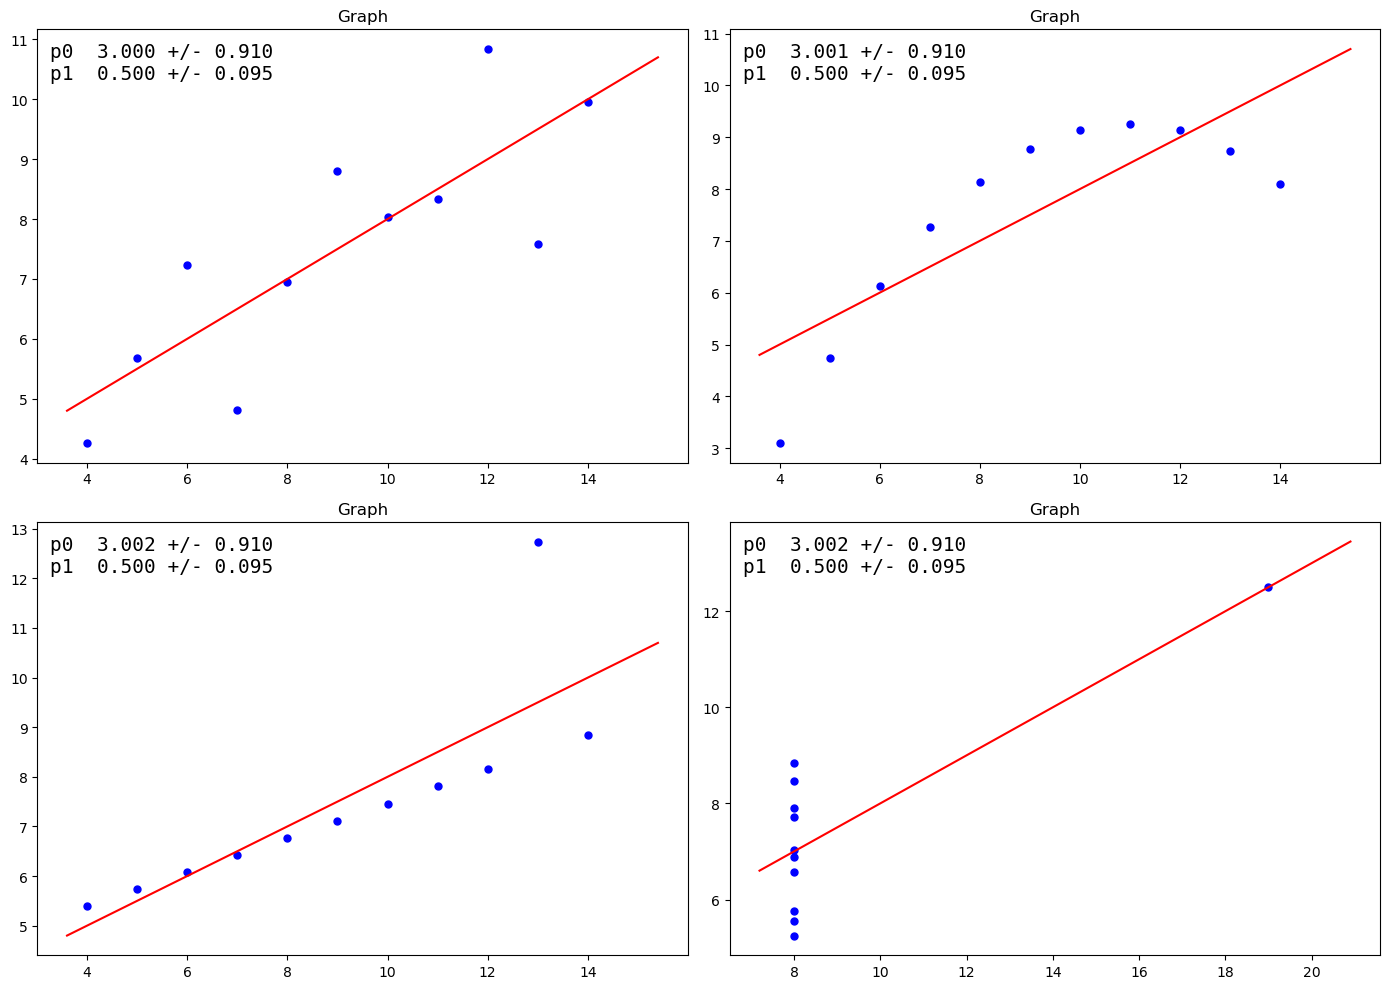

In [7]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
ax = ax.flatten()   # Go from 2d list to 1d list

# Here we make a simultaneous loop over three numpy arrays (the x_i and y_i are then 1D arrays of size 11)
for x_i, y_i, ax_i in zip(x, y, ax):
        
    ax_i.scatter(x_i, y_i, marker='.', color='blue', s=100)  # Make a scatter plot of the i'th data set as blue dots 
    ax_i.set_title('Graph') 

    chi2_object_lin = Chi2Regression(linear_fit, x_i, y_i)   # chi2-regression object
    chi2_object_lin.errordef = 1.0                           # Chi2 setting
    minuit_lin = Minuit(chi2_object_lin, p0=1.0, p1=1.0)     # Sets the initial parameters of the fit
    minuit_lin.migrad();                                     # Fit the function to the data

    x_fit = np.linspace(0.9*x_i.min(), 1.1*x_i.max())   # Create the x-axis for the plot of the fitted function,
    y_fit = linear_fit(x_fit, *minuit_lin.values[:])    # where we have unpacked the fitted values.
    ax_i.plot(x_fit, y_fit, '-r')                       # Plot the fit with a red ("r") line ("-")
    
    d = {'p0': [minuit_lin.values['p0'], minuit_lin.errors['p0']],
         'p1': [minuit_lin.values['p1'], minuit_lin.errors['p1']],
        }
    
    text = nice_string_output(d, extra_spacing=2, decimals=3)
    add_text_to_ax(0.02, 0.97, text, ax_i, fontsize=14)
    
    # Alternative "simple" way of putting values into the plots:
    # string = f"p0 = {minuit_lin.values['p0']:.3f} +/- {minuit_lin.errors['p0']:.3f}\n"
    # string += f"p1 = {minuit_lin.values['p1']:.3f} +/- {minuit_lin.errors['p1']:.3f}"
    # ax_i.text(0.05, 0.95, string, family='monospace', transform=ax_i.transAxes, fontsize=10, verticalalignment='top')
    
fig.tight_layout() 

In [ ]:
if save_plots:
    fig.savefig('plot_AnscombesQuartet.pdf', dpi=600)

# Questions:
1. Which scenario(s) looks most like real data with uncertainties, but without any mistakes/mismeasurements in it?

2. Looking closely at each of the four fits, determine which points gives the largest
   contribution to the "mismatch" (that is chi-square) between the data and the fit,
   if any single.

3. Consider how YOU would treat each of the four datasets and how you would model/fit them!


### Advanced questions:
4. How would you with (smarter) statistical techniques detect that something was
   not right without looking?


# Learning points:

This is simply to illustrate, that it is important to plot your data and inspect that visually.